In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
student_loans = pd.read_csv('data/clean_data/student_loans.csv', header=0)
student_loans.shape

(423, 52)

In [3]:
student_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 52 columns):
Unnamed: 0                             423 non-null int64
loan_amnt                              423 non-null float64
funded_amnt                            423 non-null float64
term                                   423 non-null int64
int_rate                               423 non-null float64
installment                            423 non-null float64
emp_length                             423 non-null float64
annual_inc                             423 non-null float64
pymnt_plan                             423 non-null int64
dti                                    423 non-null float64
delinq_2yrs                            423 non-null float64
inq_last_6mths                         423 non-null float64
open_acc                               423 non-null float64
total_rec_late_fee                     423 non-null float64
pub_rec                                423 non-null float64
r

In [4]:
student_loans.describe()

,Unnamed: 0,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,pymnt_plan,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,default
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.0,423.000000,...,423.0,423.0,423.0,423.0,423.0,423.0,423.0,423.0,423.0,423.0
mean,38097.477541,6616.075650,6512.943262,0.040189,12.120142,214.315035,3.302600,51264.289787,0.0,11.255319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,36888.329649,5093.890248,4997.037869,0.196635,2.731780,167.531214,3.304911,41292.041824,0.0,6.839228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,25230.000000,500.000000,500.000000,0.000000,6.000000,15.670000,0.000000,3300.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,33535.500000,3000.000000,3000.000000,0.000000,10.225000,97.300000,1.000000,24998.000000,0.0,5.440000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,36567.000000,5000.000000,5000.000000,0.000000,12.210000,168.600000,2.000000,40000.000000,0.0,11.010000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,39635.500000,8500.000000,8400.000000,0.000000,13.790000,272.870000,5.000000,66000.000000,0.0,16.285000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,790101.000000,25000.000000,25000.000000,1.000000,21.270000,861.880000,10.000000,425000.000000,0.0,29.740000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


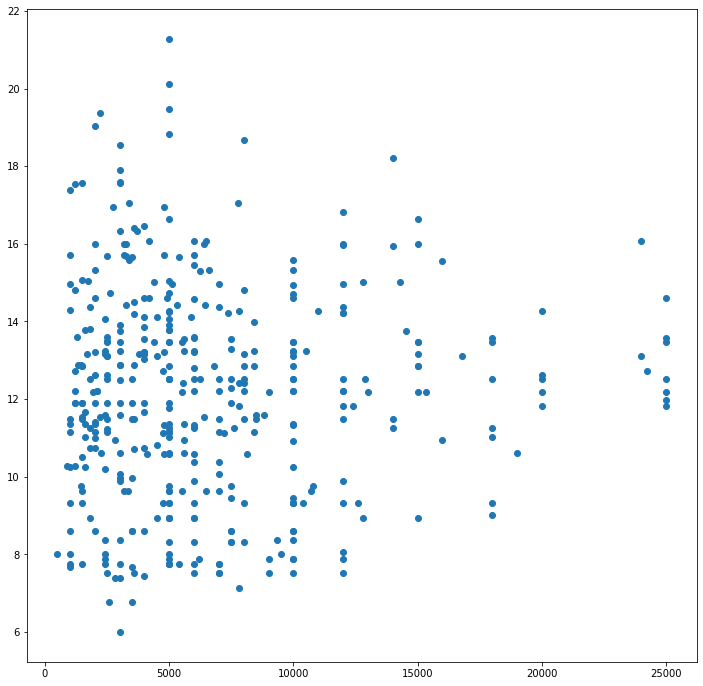

In [5]:
_ = plt.figure(figsize=(12,12))
_ = plt.scatter(student_loans.loan_amnt, student_loans.int_rate)

/home/alhalarewicz/anaconda3/envs/SBEnv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


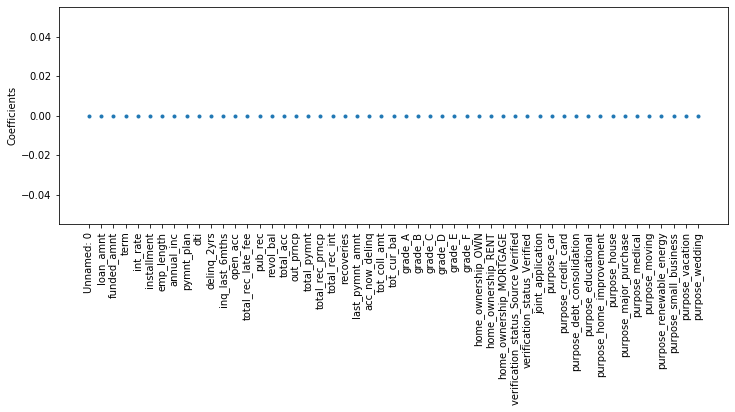

In [6]:
y = student_loans['default'].values
X = student_loans.drop('default', axis=1).values


# store feature names
names = student_loans.drop('default', axis=1).columns

# instantiate the regressor
lasso = Lasso(alpha=0.1)

# fit the model to the data and extract coef attribute
lasso_coef = lasso.fit(X, y).coef_

# plot the coefficients
_ = plt.figure(figsize=(12,4))
_ = plt.plot(range(len(names)), lasso_coef, marker='.', linestyle='none')
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')

**Will not converge because there are no student loans in default. Lasso needs instances for both classes of the target variable to converge**

In [7]:
def get_sum_squares(fitted_model, x_cols):
    
    """Compute Sum of Squares for a clustering model and return the scalar value"""
    
    # extract cluster centers
    cluster_centers = fitted_model.cluster_centers_

    #instantiate empty array for squared values
    squares = []

    # loop through all data points
    for i, point in enumerate(x_cols):
        
        # compute distance from respective cluster center
        delta = point - cluster_centers[cluster_labels[i]]
        
        # square deltas on for each axis/dimension
        delta = delta**2
        
        #compute sum dimensional sum of the deltas for each dimension
        squares.append(sum(delta))
        
    # compute sum of all deltas
    scalar = sum(squares)
    
    return scalar

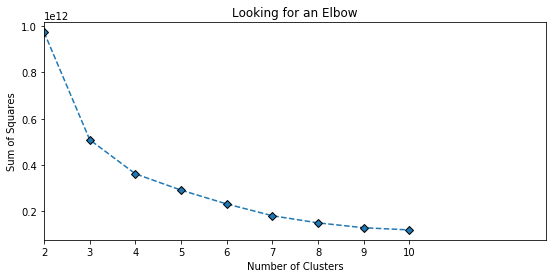

In [8]:

SS_scores = []

for i in range(2,11):
    kmean = KMeans(n_clusters=i)
    cluster_labels = kmean.fit_predict(X)
    SS_scores.append(get_sum_squares(kmean, X))

# plot scores vs SS
_ = plt.figure(figsize=(9,4))

_ = plt.plot(SS_scores, marker='D', markeredgecolor="k", linestyle='--')
_ = plt.title("Looking for an Elbow")
_ = plt.ylabel("Sum of Squares")    
_ = plt.xlabel("Number of Clusters")
_ = plt.xlim(1,11)
_ = plt.xticks(range(0,9,1),range(2,11,1))


In [9]:
kmean = KMeans(n_clusters=4)
cluster_labels = kmean.fit_predict(X)



In [10]:
### dimension reduction with Primary Component Analysis

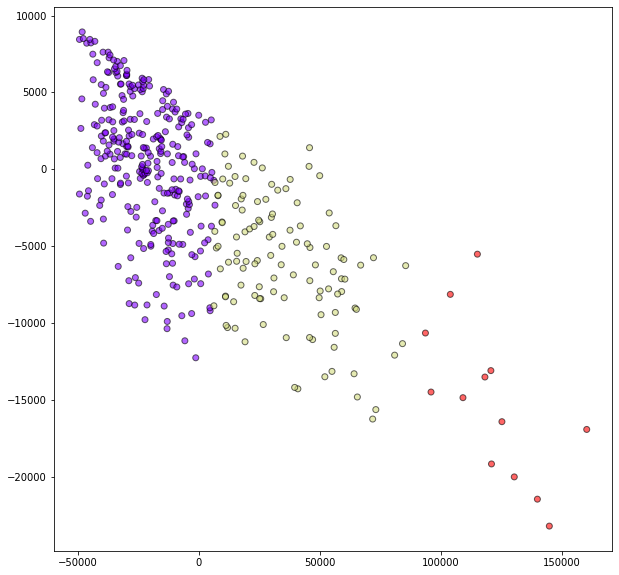

In [11]:
# instantiate PCA to reduce to 2 compmonents
pca = PCA(n_components=2)

# fit PCA to features
pca = pca.fit(X)

# transform features and convert to dataFrame
reduced = pca.transform(X)
reduced = pd.DataFrame(reduced)
reduced.columns = ['x_red', 'y_red']

# add column for cluster label for individual data points
reduced['cluster_labels'] = cluster_labels

# compute IQR of X and Y
x_iqr = stats.iqr(reduced['x_red'])
y_iqr = stats.iqr(reduced['y_red'])

# compute x and y percentiles
x_q1 = np.percentile(reduced['x_red'], 0.25)
x_q3 = np.percentile(reduced['x_red'], 0.75)
y_q1 = np.percentile(reduced['y_red'], 0.25)
y_q3 = np.percentile(reduced['y_red'], 0.75)

# remove extreme x and y values
factor = 5
reduced = reduced[reduced.x_red>=(x_q1 - (factor*x_iqr))]
reduced = reduced[reduced.x_red<=(x_q3 + (factor*x_iqr))]
reduced = reduced[reduced.y_red>=(y_q1 - (factor*y_iqr))]
reduced = reduced[reduced.y_red<=(y_q3 + (factor*y_iqr))]


# scatter plot of reduced data points
_ = plt.figure(figsize=(10,10))
_ = plt.scatter(reduced['x_red'], reduced['y_red'],c=reduced['cluster_labels'], cmap='rainbow', edgecolor='k', alpha=0.6)

**4 clusters looks good to me**

**Lets try it with all of the data**

In [12]:
other_loans = pd.read_csv('data/clean_data/other_loans.csv', header=0)

In [13]:
other_loans.shape

(886956, 52)

In [14]:
other_loans = other_loans.dropna()
other_loans.shape

(886927, 52)

In [15]:
other_loans = other_loans.iloc[:100000,:]

In [16]:
#_ = plt.figure(figsize=(12,12))
#_ = plt.scatter(other_loans.loan_amnt, other_loans.int_rate, marker='.', alpha=0.1)

In [17]:
#y = other_loans['default'].values
#X = other_loans.drop('default', axis=1).values

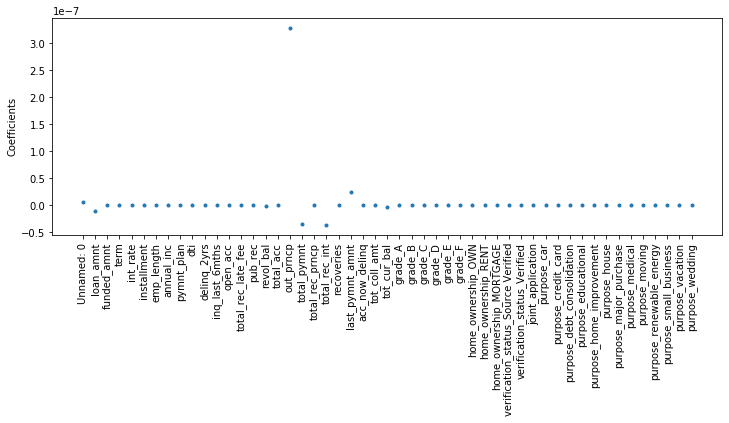

In [18]:


# store feature names
names = other_loans.drop('default', axis=1).columns

# instantiate the regressor
lasso = Lasso(alpha=0.1)

# fit the model to the data and extract coef attribute
lasso_coef = lasso.fit(other_loans.drop('default', axis=1).values, other_loans['default'].values).coef_

# plot the coefficients
_ = plt.figure(figsize=(12,4))
_ = plt.plot(range(len(names)), lasso_coef, marker='.', linestyle='none')
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')

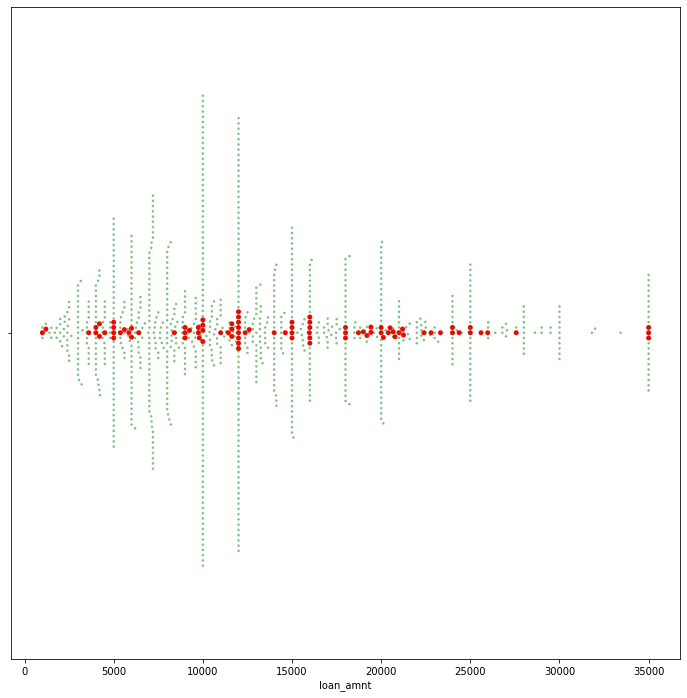

In [19]:
_ = plt.figure(figsize=(12,12))
is_default = other_loans.default==1
_ = sns.swarmplot(other_loans[is_default]['loan_amnt'], color='red')
_ = sns.swarmplot(other_loans[~is_default]['loan_amnt'][:1000], color='green', alpha=0.5, marker='.')


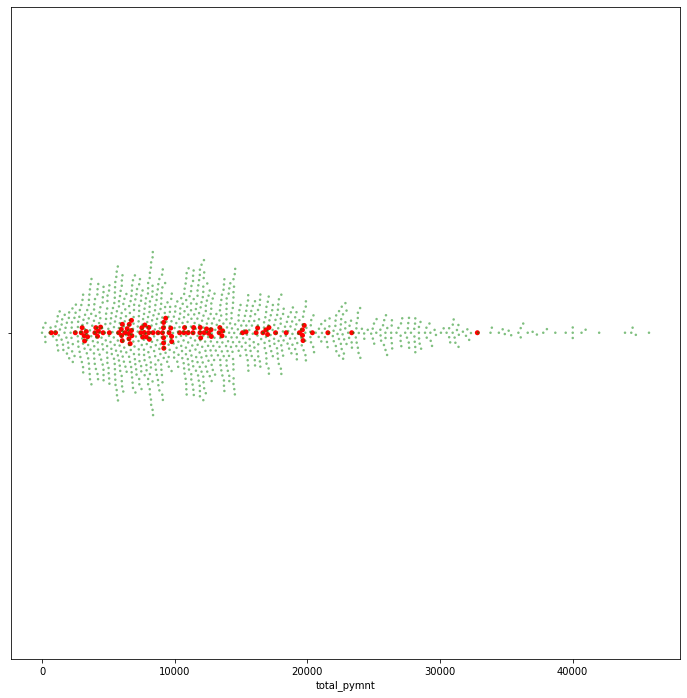

In [20]:
_ = plt.figure(figsize=(12,12))
is_default = other_loans.default==1
_ = sns.swarmplot(other_loans[is_default]['total_pymnt'], color='red')
_ = sns.swarmplot(other_loans[~is_default]['total_pymnt'][:1000], color='green', alpha=0.5, marker='.')


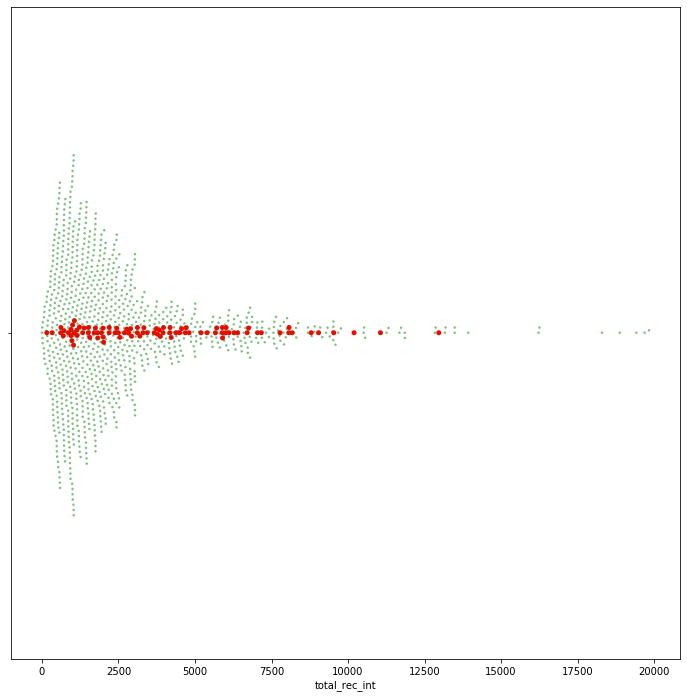

In [21]:
_ = plt.figure(figsize=(12,12))
is_default = other_loans.default==1
_ = sns.swarmplot(other_loans[is_default]['total_rec_int'], color='red')
_ = sns.swarmplot(other_loans[~is_default]['total_rec_int'][:1000], color='green', alpha=0.5, marker='.')


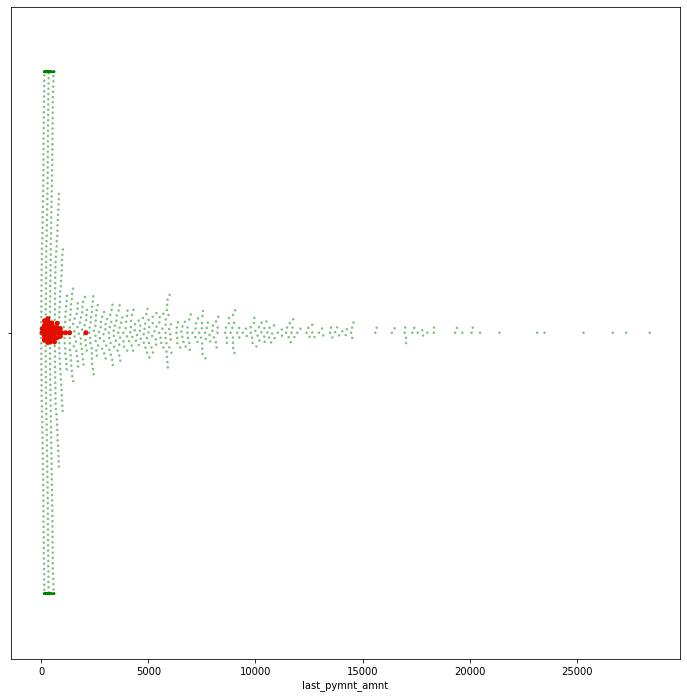

In [22]:
_ = plt.figure(figsize=(12,12))
is_default = other_loans.default==1
_ = sns.swarmplot(other_loans[is_default]['last_pymnt_amnt'], color='red')
_ = sns.swarmplot(other_loans[~is_default]['last_pymnt_amnt'][:1000], color='green', alpha=0.5, marker='.')


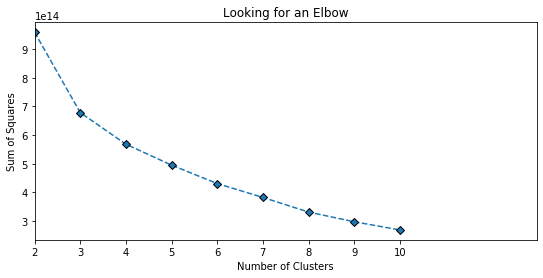

In [23]:

SS_scores = []

for i in range(2,11):
    kmean = KMeans(n_clusters=i)
    cluster_labels = kmean.fit_predict(other_loans.drop('default', axis=1).values)
    SS_scores.append(get_sum_squares(kmean, other_loans.drop('default', axis=1).values))

# plot scores vs SS
_ = plt.figure(figsize=(9,4))

_ = plt.plot(SS_scores, marker='D', markeredgecolor="k", linestyle='--')
_ = plt.title("Looking for an Elbow")
_ = plt.ylabel("Sum of Squares")    
_ = plt.xlabel("Number of Clusters")
_ = plt.xlim(1,11)
_ = plt.xticks(range(0,9,1),range(2,11,1))


For n_clusters = 3 The average silhouette_score is : 0.5782436416383848
For n_clusters = 4 The average silhouette_score is : 0.533745729686272
For n_clusters = 5 The average silhouette_score is : 0.4430043554138405


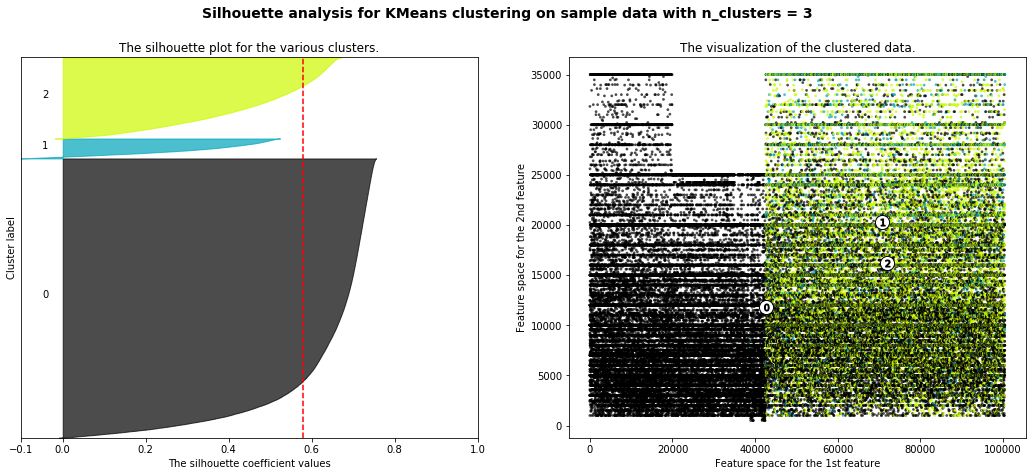

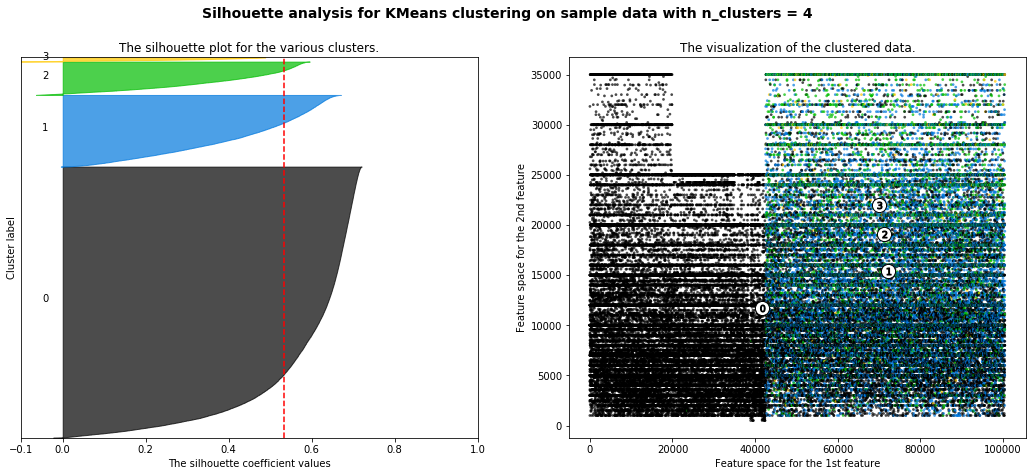

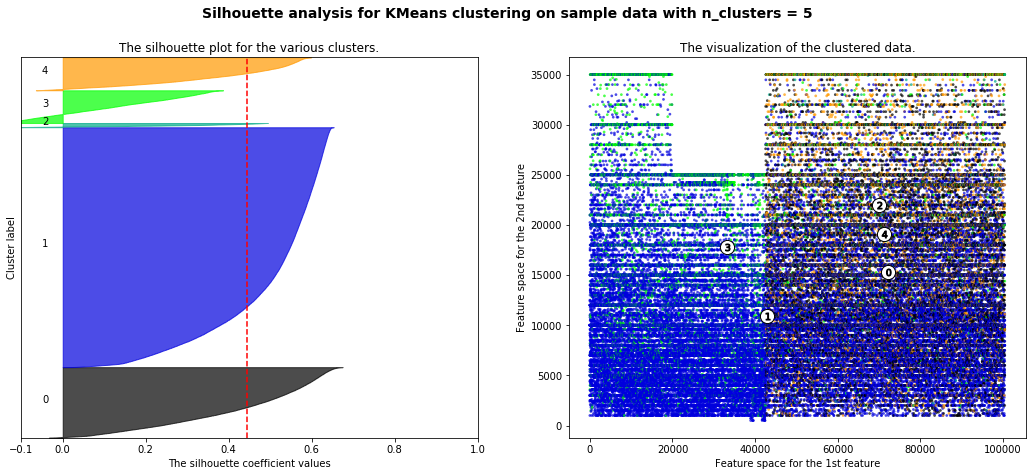

In [24]:
# specify n_clusters to test
range_n_clusters = range(3,6,1)

# create empty list for score of different n_cluster values
silhouette_score_avg = []

# loop through cluster sizes
for n_clusters in range_n_clusters:
    
    # create subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    # construct silhouette plot axes
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(other_loans.drop('default', axis=1).values) + (n_clusters + 1) * 10])
    
    # fit model and predict labels
    model = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = model.fit_predict(other_loans.drop('default', axis=1).values)
    
    # compute scores
    silhouette_avg = silhouette_score(other_loans.drop('default', axis=1).values, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    silhouette_score_avg.append(silhouette_avg)
    
    # sample silhouette values
    sample_silhouette_values = silhouette_samples(other_loans.drop('default', axis=1).values, cluster_labels)
    
    y_lower = 10
    
    # loop through number of clusters
    for i in range(n_clusters):
        
        # identify data points in cluster
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        
        # sort values in individual cluster
        ith_cluster_silhouette_values.sort()

        # compute size of cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # assign unique color to cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    # set title and axis labels
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(other_loans.drop('default', axis=1).values[:, 0], other_loans.drop('default', axis=1).values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    # plot cluster centers
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
   
    # set title and axis labels
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    # label subplots
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Max silhouette score:  0.578


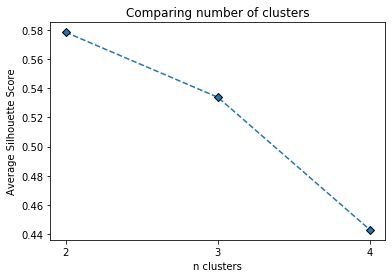

In [25]:

num_scores = len(silhouette_score_avg)
_ = plt.plot(silhouette_score_avg, marker='D', markeredgecolor="k", linestyle='--')
_ = plt.title('Comparing number of clusters')
_ = plt.xlabel('n clusters')
_ = plt.ylabel('Average Silhouette Score')
_ = plt.xticks(range(0,num_scores,1),range(2,num_scores+2,1))
print("Max silhouette score: ", max(silhouette_score_avg).round(3))

In [26]:
kmean = KMeans(n_clusters=4)
cluster_labels = kmean.fit_predict(other_loans.drop('default', axis=1).values)


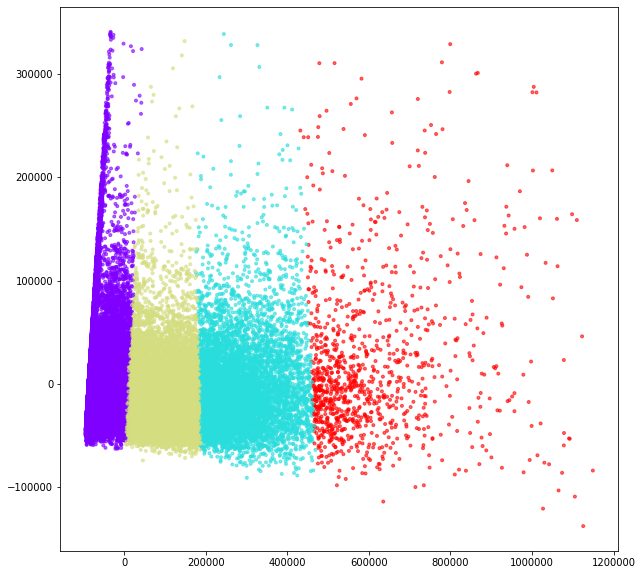

In [27]:
# instantiate PCA to reduce to 2 compmonents
pca = PCA(n_components=2)

# fit PCA to features
pca = pca.fit(other_loans.drop('default', axis=1).values)

# transform features and convert to dataFrame
reduced = pca.transform(other_loans.drop('default', axis=1).values)
reduced = pd.DataFrame(reduced)
reduced.columns = ['x_red', 'y_red']

#
reduced['cluster_labels'] = cluster_labels


# compute IQR of X and Y
x_iqr = stats.iqr(reduced['x_red'])
y_iqr = stats.iqr(reduced['y_red'])

# compute x and y percentiles
x_q1 = np.percentile(reduced['x_red'], 0.25)
x_q3 = np.percentile(reduced['x_red'], 0.75)
y_q1 = np.percentile(reduced['y_red'], 0.25)
y_q3 = np.percentile(reduced['y_red'], 0.75)

# remove extreme x and y values
factor = 10
reduced = reduced[reduced.x_red>=(x_q1 - (factor*x_iqr))]
reduced = reduced[reduced.x_red<=(x_q3 + (factor*x_iqr))]
reduced = reduced[reduced.y_red>=(y_q1 - (factor*y_iqr))]
reduced = reduced[reduced.y_red<=(y_q3 + (factor*y_iqr))]


# scatter plot of reduced data points
_ = plt.figure(figsize=(10,10))
_ = plt.scatter(reduced['x_red'], reduced['y_red'],c=reduced['cluster_labels'], cmap='rainbow', marker='.', alpha=0.6)

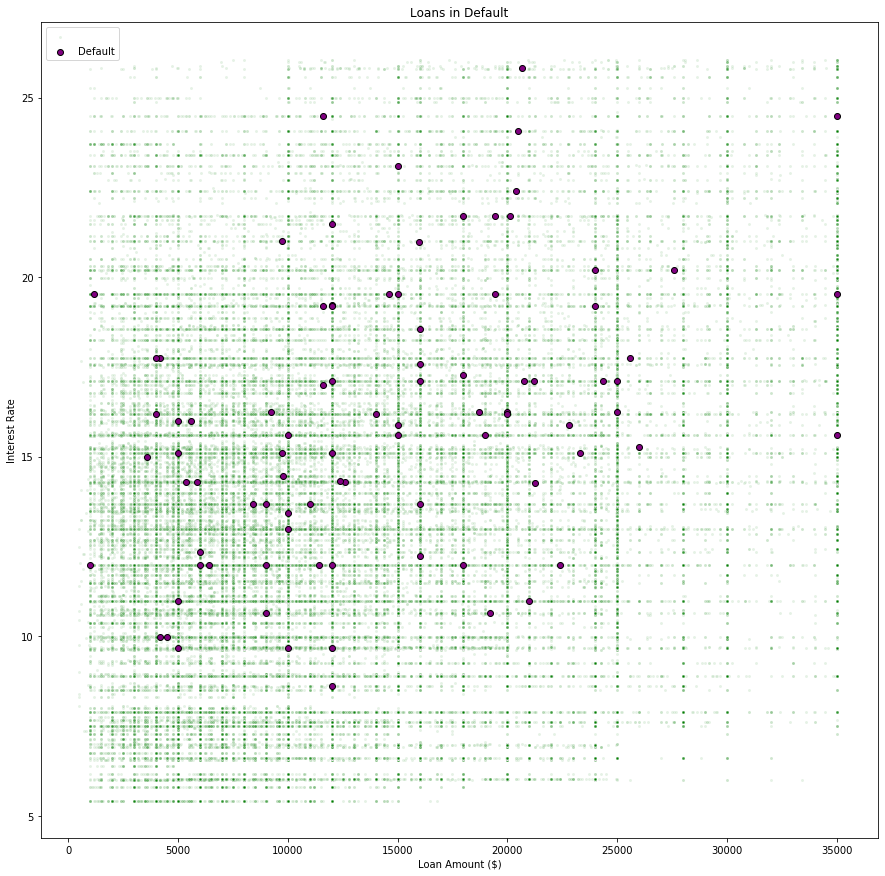

In [28]:
_ = plt.figure(figsize=(15, 15))
_ = plt.scatter(other_loans[other_loans.default==0].loan_amnt, other_loans[other_loans.default==0].int_rate, alpha=0.1, c='green', marker='.', edgecolor='white')
_ = plt.scatter(other_loans[other_loans.default==1].loan_amnt, other_loans[other_loans.default==1].int_rate, alpha=1, c='purple', edgecolor='k')
_ = plt.xlabel('Loan Amount ($)')
_ = plt.ylabel('Interest Rate')
_ = plt.title('Loans in Default')
_ = plt.legend(['', 'Default'])